# Geodatenanalyse 1

## Übung 8: Fortgeschrittene Sensitivitätsanalyse - Lösung


Für fortgeschrittene Sensitivitätsanalysen gibt es in Python das Package `SALib` (https://salib.readthedocs.io/en/latest/index.html), in dem viele gängige Methoden (z.B. Morris Method, Sobol Indices) und die benötigten Sampling-Strategien implementiert sind. 

### Sobol Indizes

Zur Bestimmung der Sobol Indizes werden zwei Algorithmen aus SALib benötigt: Mit `SALib.sample.saltelli.sample()` erfolgt das Generieren der Input-Wertematrix, danach werden mit diesen Inputs die Modelloutputs erzeugt, und mit `SALib.analyze.sobol.analyze()` erfolgt schließlich die Bestimmung der Sobol-Indizes. 

`SALib.sample.saltelli.sample()` benötigt als Input-Argument ein Python Dictionary mit der folgenden Angaben: 

'{'num_vars': Anzahl_unsichere_Parameter, 'names': [Name1, Name2, ...], 'bounds':[[min1, max1], [min2, max2], ...]}'

Definiert nun zuerst ein Python Dictionary mit den entsprechenden Angaben zu dem analytischen Abbaumodell aus den letzten Übungen, und erzeugt Euch dann mit `SALib.sample.saltelli.sample()` einen Inputdatensatz für das analytische Modell. 

Inspiziert anschließend den generierten Inputdatensatz um die  Sampling Strategie nachzuvollziehen.  

In [1]:
# [1] 
# benötigtes Package importieren
from SALib.sample.saltelli import sample

# Dictionary erzeugen
problem = {
    'num_vars': 6,
    'names': ['deltaC', 'epsilon', 's', 'neff', 't', 'grad'],
    'bounds': [[3.8, 4.8],
               [-3.2, -1.1],
               [415, 423],
               [0.12, 0.3],
               [3e8, 3.3e8],
               [1.3e-3, 1.6e-3]]
}

# Inputmatrix erzeugen
X = sample(problem, 1000)

# Datensatz inspizieren
print(X)

[[ 4.01972656e+00 -2.99697266e+00  4.19148438e+02  2.41816406e-01
   3.08408203e+08  1.57216797e-03]
 [ 3.84589844e+00 -2.99697266e+00  4.19148438e+02  2.41816406e-01
   3.08408203e+08  1.57216797e-03]
 [ 4.01972656e+00 -1.31123047e+00  4.19148438e+02  2.41816406e-01
   3.08408203e+08  1.57216797e-03]
 ...
 [ 4.15205078e+00 -2.18178711e+00  4.18441406e+02  1.80556641e-01
   3.24067383e+08  1.44838867e-03]
 [ 4.15205078e+00 -2.18178711e+00  4.18441406e+02  1.80556641e-01
   3.00424805e+08  1.52075195e-03]
 [ 4.15205078e+00 -2.18178711e+00  4.18441406e+02  1.80556641e-01
   3.00424805e+08  1.44838867e-03]]


Venwendet nun die eben erzeugten Modell-Inputs, um mit einer `for` Schleife und dem analytischen Modell der letzten Übungen die entsprechenden Outputs (hydraulische Leitfähigkeit und biologische Abbaurate) zu berechnen (siehe Übung 8 Monte Carlo Methoden). 

In [2]:
# [2]
# Packages laden
from SALib.analyze.sobol import analyze
import numpy as np

# Anzahl der Modelldurchläufe sowie leere Arrays für Outputs definieren 
n = len(X)
kf =np.zeros(n)
lambda_rate = np.zeros(n)

# mit for-Schleife und analytischem Modell Outputs erzeugen
for i in range(n):
    kf[i] = (X[i, 2]*X[i, 3])/(X[i, 4]*X[i, 5])
    lambda_rate[i] = -(X[i, 0]*kf[i]*X[i, 5])/(X[i, 1]*X[i, 2]*X[i, 3])

Y = lambda_rate*3600*24*365 # to get values as [1/a]

Als Inputs für `SALib.analyze.sobol.analyze()` sind das Eingangs-Dictionary, sowie die Modell-Ouputs erforderlich. Mit der zusätzlichen Angabe von "print_to_console=True" könnt Ihr Euch die Indizes direkt ausgeben lassen. 

Schaut Euch die Werte an, und vergleicht sie mit den Ergebnissen der Morris Method und Contribution-to-Variance Analyse. 

In [3]:
#[3]
# Packages laden
from SALib.analyze.sobol import analyze

# Sobol Indizes berechnen
Sobol = analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
deltaC 0.043346 0.017920 0.047434 0.004627
epsilon 0.974278 0.088561 0.972001 0.065351
s 0.000000 0.000000 0.000000 0.000000
neff -0.000000 0.000000 0.000000 0.000000
t 0.006188 0.009114 0.007926 0.000765
grad -0.000000 0.000000 0.000000 0.000000

Parameter_1 Parameter_2 S2 S2_conf
deltaC epsilon 0.002295 0.039668
deltaC s 0.004978 0.024317
deltaC neff 0.004978 0.024317
deltaC t 0.005016 0.023872
deltaC grad 0.004978 0.024317
epsilon s -0.008404 0.114446
epsilon neff -0.008404 0.114446
epsilon t -0.007518 0.114524
epsilon grad -0.008404 0.114446
s neff -0.000000 0.000000
s t -0.000000 0.000000
s grad -0.000000 0.000000
neff t 0.000000 0.000000
neff grad 0.000000 0.000000
t grad 0.001201 0.012954


Um die Effekte Erster Ordnung und Totalen Effekte zu vergleichen, visualisiert diese abschließend in einer Graphik. Vergleicht dabei die verschiedenen Effekte in Bezug auf die einzelnen Parameter und interpretiert diese. 

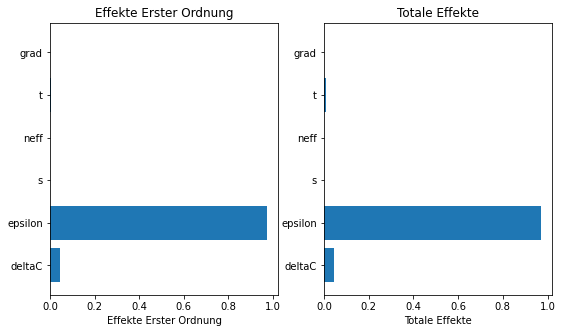

In [4]:
#[4]
import matplotlib.pyplot as plt

labels = ['deltaC', 'epsilon', 's', 'neff', 't', 'grad']

fig = plt.figure(1, figsize=(9, 5))

ax = fig.add_subplot(1,2,1)
plt.barh(labels, width=Sobol['S1'])
plt.xlabel('Effekte Erster Ordnung')
plt.title ('Effekte Erster Ordnung')

ax1 = fig.add_subplot(1,2,2)
plt.barh(labels, width=Sobol['ST'])
plt.xlabel('Totale Effekte')
plt.title ('Totale Effekte')
plt.show()

## Ende

### Referenzen: 

Würth et al. (2021): Quantifying biodegradation rate constants of o-xylene by combining compound-specific isotope analysis and groundwater dating. Journal of Contaminant Hydrology, 238, 103757